In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

# Quantitative Basics
Just going over Volatility, Alpha and Beta really. As these numbers are often quoted, anyone starting out with Python to inform their investing decisions would probably want some understanding of these terms.

In [1]:
# Set the plotting DPI settings to be a bit higher.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8.0, 5.0]
plt.rcParams['figure.dpi'] = 150

# Volatility
Get two stocks and measure the volatility.

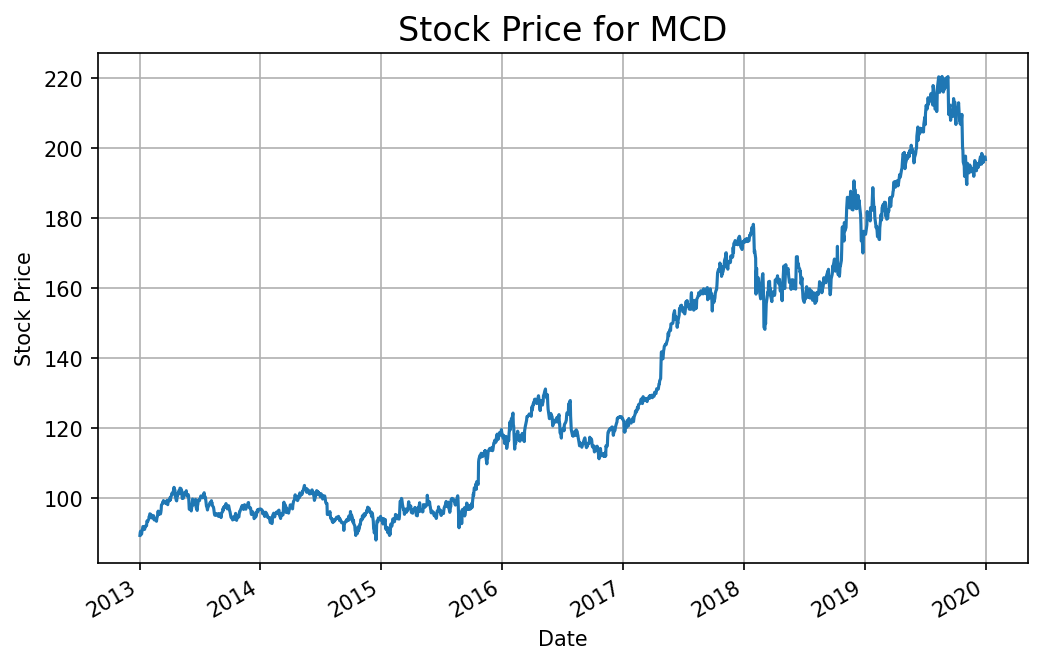

In [2]:
import pandas_datareader.data as pdr

def dataForTicker(ticker, start, end):
    '''Use Pandas Data Reader to get stock price over time'''
    tickerData = pdr.DataReader(ticker, "yahoo", start, end);
    return tickerData

mcd = dataForTicker('mcd', '2013-01-01', '2020-01-01')
mcd['Open'].plot() # Plot the open price

plt.grid()
plt.ylabel('Stock Price');
plt.title('Stock Price for MCD', fontsize=16);

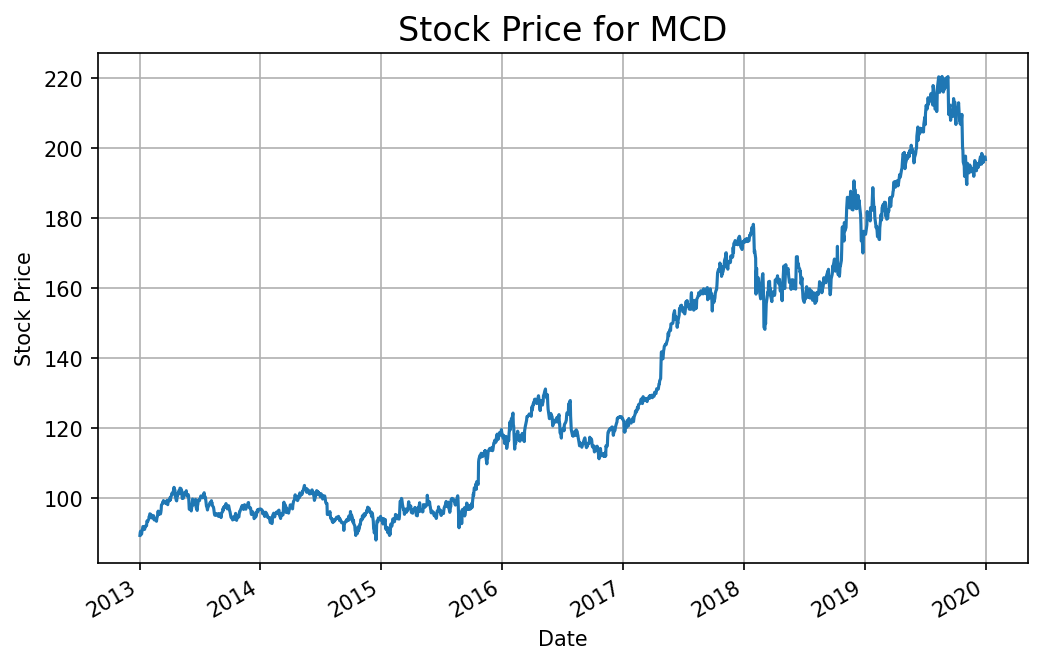

In [3]:
import pandas_datareader.data as pdr

def dataForTicker(ticker, start, end):
    '''Use Pandas Data Reader to get stock price over time'''
    tickerData = pdr.DataReader(ticker, "yahoo", start, end);
    return tickerData

mcd = dataForTicker('mcd', '2013-01-01', '2020-01-01')
mcd['Open'].plot() # Plot the open price

plt.grid()
plt.ylabel('Stock Price');
plt.title('Stock Price for MCD', fontsize=16);

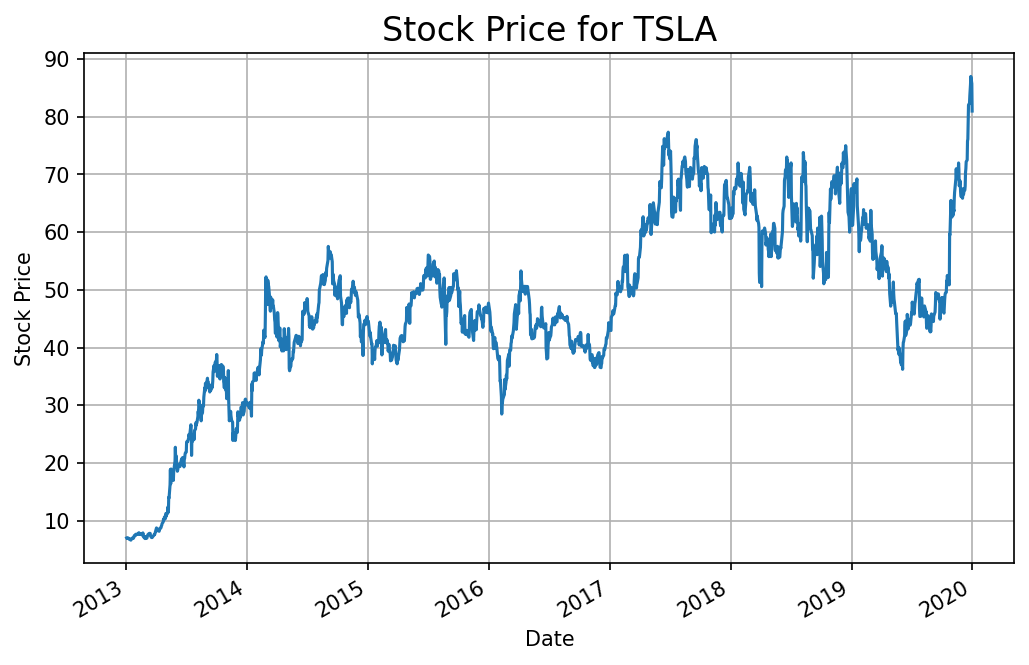

In [5]:
tsla = dataForTicker('tsla', '2013-01-01', '2020-01-01')
tsla['Open'].plot()

plt.grid()
plt.ylabel('Stock Price');
plt.title('Stock Price for TSLA', fontsize=16);

### Find the relative returns to previous day.

In [7]:
tsla['Adj Close']

Date
2013-01-02     7.072000
2013-01-03     6.954000
2013-01-04     6.880000
2013-01-07     6.868000
2013-01-08     6.736000
                ...    
2019-12-24    85.050003
2019-12-26    86.188004
2019-12-27    86.075996
2019-12-30    82.940002
2019-12-31    83.666000
Name: Adj Close, Length: 1762, dtype: float64

In [9]:
tsla['Adj Close']/tsla['Adj Close'].shift(-1)-1

Date
2013-01-02    0.016969
2013-01-03    0.010756
2013-01-04    0.001747
2013-01-07    0.019596
2013-01-08    0.001189
                ...   
2019-12-24   -0.013204
2019-12-26    0.001301
2019-12-27    0.037810
2019-12-30   -0.008677
2019-12-31         NaN
Name: Adj Close, Length: 1762, dtype: float64

In [10]:
mcd['Adj Close']/mcd['Adj Close'].shift(-1) -1

Date
2013-01-02   -0.005627
2013-01-03    0.008681
2013-01-04   -0.011660
2013-01-07   -0.000330
2013-01-08    0.001431
                ...   
2019-12-24   -0.001979
2019-12-26   -0.005601
2019-12-27    0.006399
2019-12-30   -0.003542
2019-12-31         NaN
Name: Adj Close, Length: 1762, dtype: float64

In [18]:
import numpy as np # To use logarithms

np.log(mcd['Adj Close']/mcd['Adj Close'].shift(-1)) # log returns instead

Date
2013-01-02   -0.005643
2013-01-03    0.008643
2013-01-04   -0.011728
2013-01-07   -0.000330
2013-01-08    0.001430
                ...   
2019-12-24   -0.001981
2019-12-26   -0.005617
2019-12-27    0.006378
2019-12-30   -0.003549
2019-12-31         NaN
Name: Adj Close, Length: 1762, dtype: float64

### Plot these numbers as a distribution.

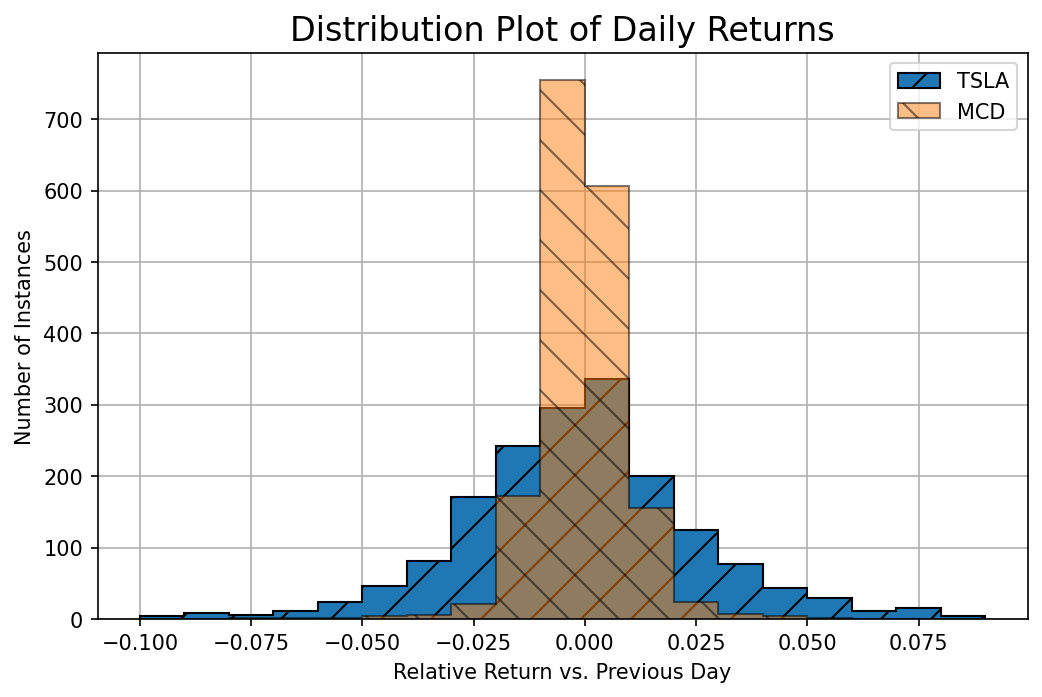

In [20]:
logReturnsTsla=np.log(tsla['Adj Close']/tsla['Adj Close'].shift(-1))
logReturnsMcd=np.log(mcd['Adj Close']/mcd['Adj Close'].shift(-1))

# Volatility is std deviation of this graph
logReturnsTsla.hist(bins=np.arange(-0.1,0.1,0.01),
                    hatch='/', 
                    alpha=1, 
                    edgecolor='k', 
                    histtype='step', 
                    fill=True) 

logReturnsMcd.hist(bins=np.arange(-0.1,0.1,0.01),
                   hatch='\\', 
                   alpha=0.5, 
                   edgecolor='k', 
                   histtype='step', 
                   fill=True)

plt.xlabel('Relative Return vs. Previous Day')
plt.ylabel('Number of Instances')
plt.title('Distribution Plot of Daily Returns', fontsize=16)
plt.legend(['TSLA','MCD'])

### Volatility is std. dev. of this distribution

In [10]:
print('The volatility of MCD is:', 
      (np.log(mcd['Adj Close']/mcd['Adj Close'].shift(-1))).std())

print('The volatility of TSLA is:', 
      (np.log(tsla['Adj Close']/tsla['Adj Close'].shift(-1))).std())

The volatility of MCD is: 0.009861890090647517
The volatility of TSLA is: 0.030840343568475932


# Correlation

Text(0, 0.5, 'Price')

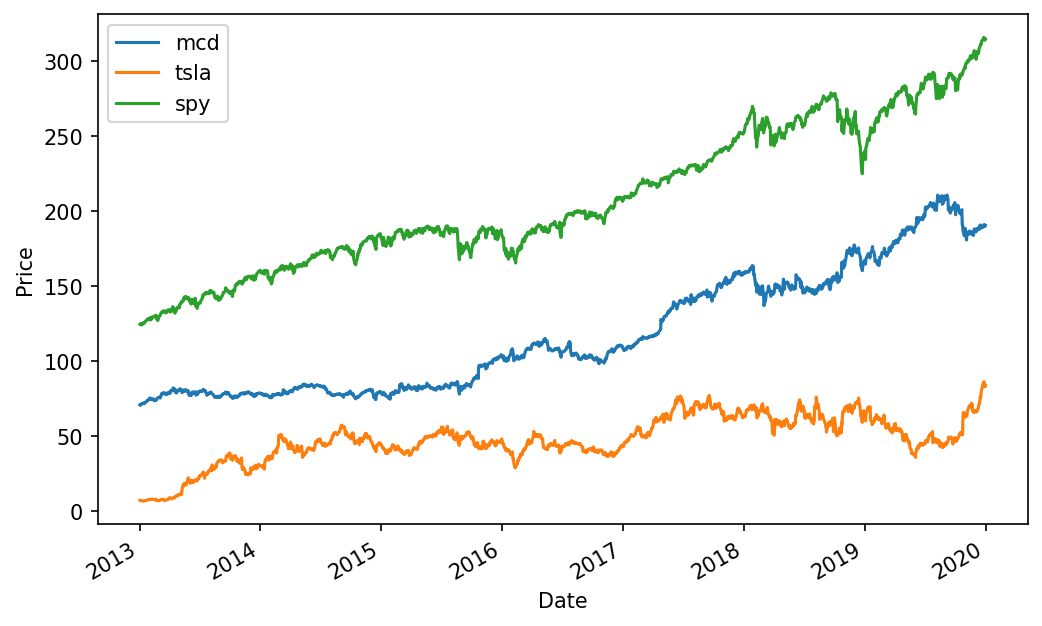

In [21]:
import pandas as pd
spy = dataForTicker('spy', '2013-01-01', '2020-01-01')

stocks=pd.concat([mcd['Adj Close'], 
                  tsla['Adj Close'], 
                  spy['Adj Close']], 
                 axis=1, 
                 keys=['mcd','tsla','spy'])
stocks.plot()
plt.ylabel('Price')

$Correlation = \frac{\sum_{}^{}\left(x_{i}-\bar{x}_{i}\right)\left(y_{i}-\bar{y}_{i}\right)}{\sqrt{\sum_{}^{}\left(x_{i}-\bar{x}_{i}\right)^{2}\sum_{}^{}\left(y_{i}-\bar{y}_{i}\right)^{2}}}$

In [22]:
Data = pd.DataFrame()

# Get the stock prices as columns
Data['$ MCD Stock Price'] = stocks['mcd'].round(2)
Data['$ TSLA Stock Price'] = stocks['tsla'].round(2)

# Compute the daily returns
Data['MCD Daily Returns'] = stocks['mcd'] / stocks['mcd'].shift(-1)-1 # X
Data['TSLA Daily Returns'] = stocks['tsla'] / stocks['tsla'].shift(-1)-1 # Y

# Calculate Correlation Terms
Data['X-Xavg'] = Data['MCD Daily Returns'] - Data['MCD Daily Returns'].mean()
Data['Y-Yavg'] = Data['TSLA Daily Returns'] - Data['TSLA Daily Returns'].mean()

Data['(X-Xavg)^2'] = Data['X-Xavg']**2
Data['(Y-Yavg)^2'] = Data['Y-Yavg']**2

Data['(X-Xavg)*(Y-Yavg)'] = Data['X-Xavg'] * Data['Y-Yavg']

In [23]:
Data.round(5)

,$ MCD Stock Price,$ TSLA Stock Price,MCD Daily Returns,TSLA Daily Returns,X-Xavg,Y-Yavg,(X-Xavg)^2,(Y-Yavg)^2,(X-Xavg)*(Y-Yavg)
Date,,,,,,,,,
2013-01-02,70.83,7.07,-0.00563,0.01697,-0.00511,0.01790,0.00003,0.00032,-0.00009
2013-01-03,71.23,6.95,0.00868,0.01076,0.00919,0.01168,0.00008,0.00014,0.00011
2013-01-04,70.61,6.88,-0.01166,0.00175,-0.01115,0.00268,0.00012,0.00001,-0.00003
2013-01-07,71.45,6.87,-0.00033,0.01960,0.00018,0.02052,0.00000,0.00042,0.00000
2013-01-08,71.47,6.74,0.00143,0.00119,0.00194,0.00212,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...
2019-12-24,189.66,85.05,-0.00198,-0.01320,-0.00147,-0.01228,0.00000,0.00015,0.00002
2019-12-26,190.04,86.19,-0.00560,0.00130,-0.00509,0.00223,0.00003,0.00000,-0.00001
2019-12-27,191.11,86.08,0.00640,0.03781,0.00691,0.03874,0.00005,0.00150,0.00027


In [26]:
#Data.to_csv('Correlation.csv')

In [95]:
print('The Correlation Between TSLA and MCD is:')
Data['(X-Xavg)*(Y-Yavg)'].sum()/np.sqrt( (Data['X-Xavg']**2).sum() \
                                        * (Data['Y-Yavg']**2).sum() )

The Correlation Between TSLA and MCD is:


0.12972633744688913

In [96]:
(stocks/stocks.shift(-1)-1).corr() # Can see that MCD is a lot more correlated to the S&P500 Index than TSLA

,mcd,tsla,spy
mcd,1.000000,0.129726,0.482665
tsla,0.129726,1.000000,0.351623
spy,0.482665,0.351623,1.000000


# Alpha and Beta

In [27]:
priceDiff = (np.log(stocks/stocks.shift(-1)))

Text(0.5, 1.0, 'MCD Return vs. S&P500 Return, Daily')

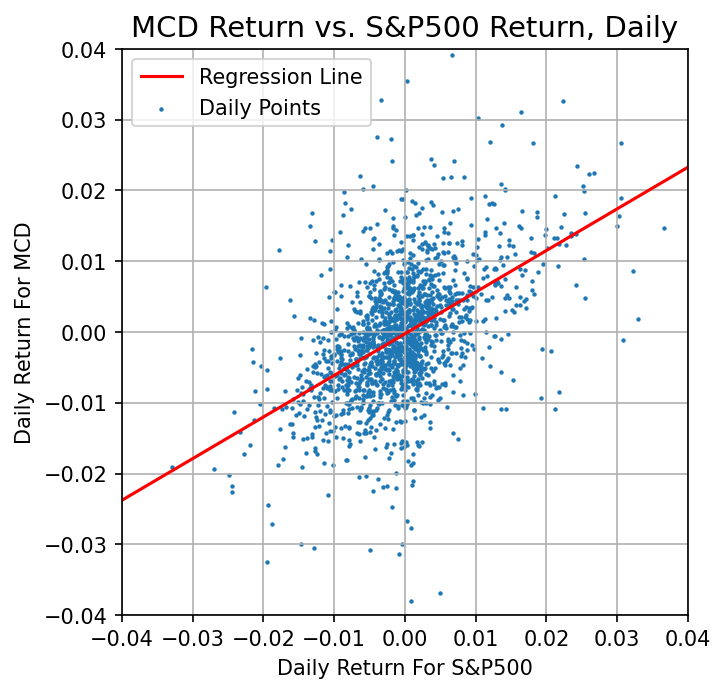

In [124]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

# Perform linear regression
linear_regressor.fit(priceDiff['spy'].dropna().to_numpy().reshape(-1, 1), 
                     priceDiff['mcd'].dropna().to_numpy().reshape(-1, 1)) 

# Plot MCD scatter points
plt.scatter((np.log(stocks/stocks.shift(-1)))['spy'], 
            (np.log(stocks/stocks.shift(-1)))['mcd'],
            marker='.',
            s=5)

plt.plot([-0.05, 0.05], 
         linear_regressor.predict(np.array([-0.05, 0.05]).reshape(-1, 1)), 
         'r')

plt.grid()
plt.axis('square')
plt.xlim([-0.04,0.04])
plt.ylim([-0.04,0.04])

plt.xlabel('Daily Return For S&P500')
plt.ylabel('Daily Return For MCD')
plt.legend(['Regression Line','Daily Points'])
plt.title('MCD Return vs. S&P500 Return, Daily', fontsize=14)

In [14]:
linear_regressor.coef_

array([[0.58837684]])

In [15]:
linear_regressor.intercept_

array([-0.00025201])

Text(0.5, 1.0, 'TSLA Return vs. S&P500 Return, Daily')

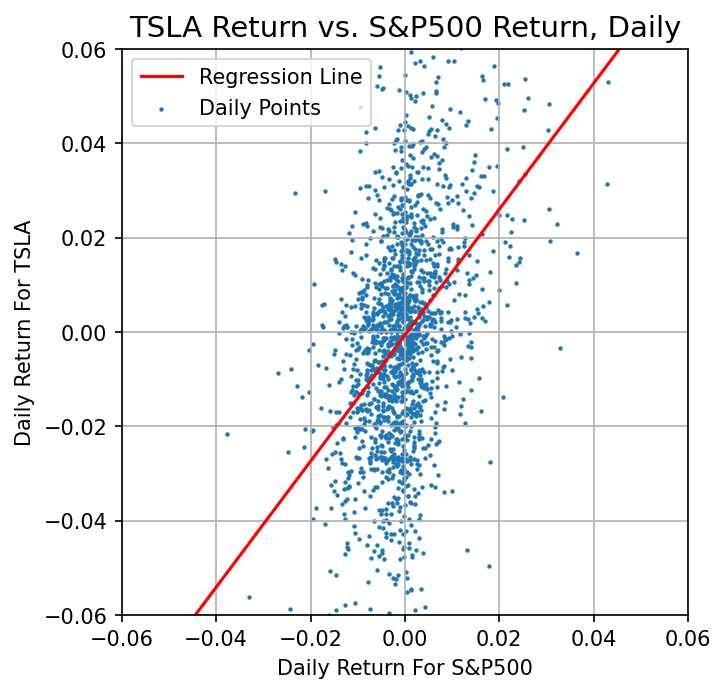

In [125]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  # create object for the class

# Perform linear regression on TSLA
linear_regressor.fit(priceDiff['spy'].dropna().to_numpy().reshape(-1, 1), 
                     priceDiff['tsla'].dropna().to_numpy().reshape(-1, 1)) 

# Plot TSLA scatter plot
plt.scatter((np.log(stocks/stocks.shift(-1)))['spy'], 
            (np.log(stocks/stocks.shift(-1)))['tsla'], 
            marker='.',
            s=5)

plt.plot([-0.05, 0.05], 
         linear_regressor.predict(np.array([-0.05, 0.05]).reshape(-1, 1)), 
         'r')

plt.grid()
plt.axis('square')
plt.xlim([-0.06,0.06])
plt.ylim([-0.06,0.06])

plt.xlabel('Daily Return For S&P500')
plt.ylabel('Daily Return For TSLA')
plt.legend(['Regression Line','Daily Points'])
plt.title('TSLA Return vs. S&P500 Return, Daily', fontsize=14)

In [56]:
linear_regressor.coef_

array([[1.33484244]])

In [57]:
linear_regressor.intercept_

array([-0.00069962])

Text(0.5, 1.0, 'TSLA Return vs. S&P500 Return &\n MCD Return vs. S&P500 Return, Daily.')

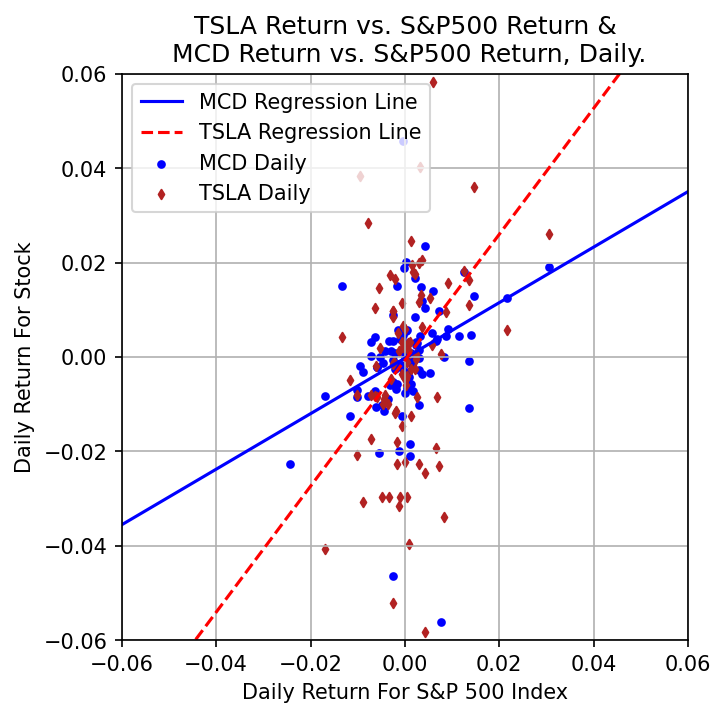

In [126]:
# Plot both TSLA and MCD on one graph

# Take 100 random points, so that the graph is less busy
sampledPoints = stocks.sample(100).index

# Perform linear regression for MCD
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(priceDiff['spy'].dropna().to_numpy().reshape(-1, 1), 
                     priceDiff['mcd'].dropna().to_numpy().reshape(-1, 1)) 

# Plot MCD scatter plot
plt.scatter((np.log(stocks/stocks.shift(-1)))['spy'][sampledPoints], 
            (np.log(stocks/stocks.shift(-1)))['mcd'][sampledPoints], 
            marker='o',
            linewidths=1,
            color='blue',
            s=10)

# Plot MCD linear fit line
plt.plot([-0.1, 0.1], linear_regressor.predict(np.array([-0.1, 0.1]).reshape(-1, 1)), 'b')


# Perform linear regression for TSLA
linear_regressor = LinearRegression()
linear_regressor.fit(priceDiff['spy'].dropna().to_numpy().reshape(-1, 1), 
                     priceDiff['tsla'].dropna().to_numpy().reshape(-1, 1))

# Plot TSLA scatter plot
plt.scatter((np.log(stocks/stocks.shift(-1)))['spy'][sampledPoints], 
            (np.log(stocks/stocks.shift(-1)))['tsla'][sampledPoints], 
            marker='d',
            linewidths=1,
            color='firebrick',
            s=10)

# Plot TSLA linear fit line
plt.plot([-0.1, 0.1], linear_regressor.predict(np.array([-0.1, 0.1]).reshape(-1, 1)), 'r--')

# Plot formatting
plt.grid()
plt.axis('square')
plt.xlim([-0.06,0.06])
plt.ylim([-0.06,0.06])
plt.legend(['MCD Regression Line',
            'TSLA Regression Line',
            'MCD Daily',
            'TSLA Daily'])
plt.xlabel('Daily Return For S&P 500 Index')
plt.ylabel('Daily Return For Stock')
plt.title('TSLA Return vs. S&P500 Return &\n MCD Return vs. S&P500 Return, Daily.', fontsize=12)

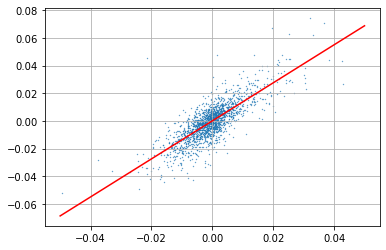

In [34]:
blk = dataForTicker('blk', '2013-01-01', '2020-01-01') # Blackrock Stock

# Put alongside SPY in a DataFrame
stocks=pd.concat([spy['Adj Close'],
                  blk['Adj Close']], 
                 axis=1, keys=['spy','blk'])

# Daily Returns
priceDiff = (np.log(stocks/stocks.shift(-1)))

# Perform linear regression
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(priceDiff['spy'].dropna().to_numpy().reshape(-1, 1), 
                     priceDiff['blk'].dropna().to_numpy().reshape(-1, 1))  

# Plot Points
plt.scatter((np.log(stocks/stocks.shift(-1)))['spy'], 
            (np.log(stocks/stocks.shift(-1)))['blk'], s=0.1)
plt.grid()
plt.plot([-0.05, 0.05], 
         linear_regressor.predict(np.array([-0.05, 0.05]).reshape(-1, 1)), 
         'r')

In [40]:
print('The gradient of the fitted line is:', linear_regressor.coef_[0][0])
print('The intercept of the fitted line is:', linear_regressor.intercept_[0])

The gradient of the fitted line is: 1.3757998598475336
The intercept of the fitted line is: 0.00013572620905773604


# Discounted Cash Flows

Text(0.5, 1.0, 'Discounted Cash Flow Projection For INTC')

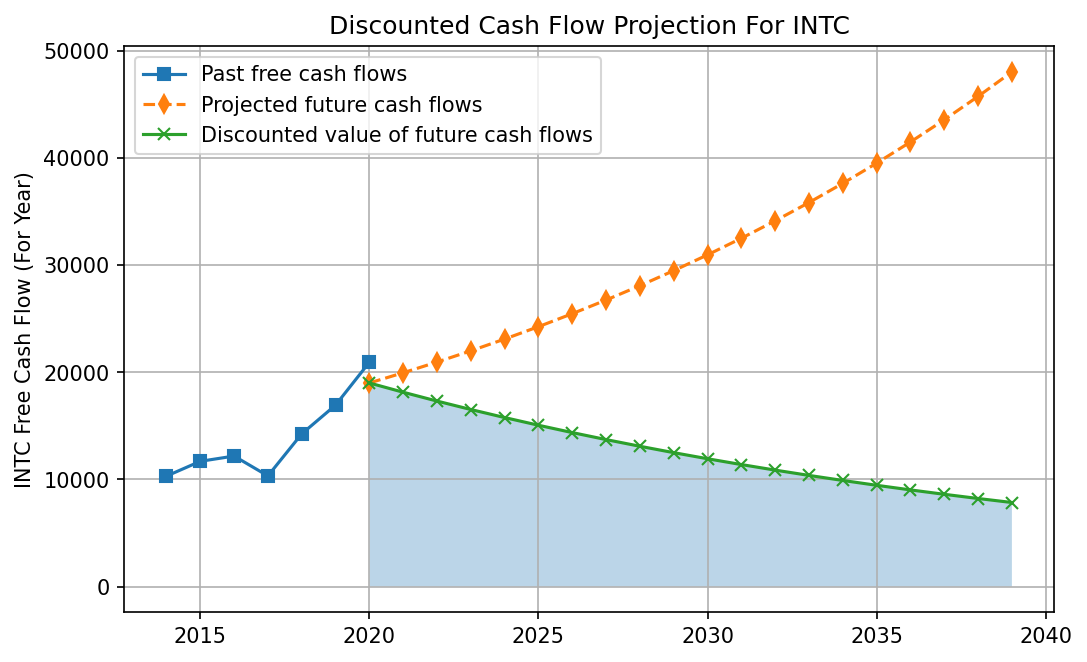

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# Nice please to see cash flows is https://www.macrotrends.net/stocks/charts/INTC/intel/free-cash-flow

#Here is the rough cash flow data for the company. Values in millions
cashFlow_years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]
freeCashFlow = [10313.00, 11692.00, 12183.00, 10332.00, 14251.00, 16932.00, 20931.00]#intc
freeCashFlowData = np.array([cashFlow_years, freeCashFlow])


growth = np.zeros(6)
for i in range(1, len(growth)+1):
    growth[i-1] = (freeCashFlowData[1,i]/freeCashFlowData[1,i-1]-1) * 100

def calcDCF(discRate, growthRate, currentFcf, numYears, startYear):
    '''
    Define a function that returns an array containing cash flow and 
    discounted cash flow for each future year.
    '''
    
    # Start zero arrays and fill the array with a loop.
    futureCashFlows = np.zeros(numYears)
    futureDiscCashFlows = np.zeros(numYears)
    
    # Now fill the array with a loop
    for i in range(0, numYears):
        futureCashFlows[i] = currentFcf * (growthRate+1) ** i
        futureDiscCashFlows[i] = futureCashFlows[i]/((1+discRate)**i)
    
    # Have an array for the future years, from say, 2020 to 2020 + numYears
    futureYears = np.array(range(startYear, startYear+numYears))
    
    # Return the arrays of: future cash flows
    # Future discounted Cash Flows
    # Future years that those cash flowws occur in
    return [futureCashFlows, futureDiscCashFlows, futureYears]

# Run the function
[futureCashFlows, futureDiscCashFlows, futureYears] = calcDCF(discRate=0.1, 
                                                              growthRate=0.05, 
                                                              currentFcf=19000, 
                                                              numYears=20, 
                                                              startYear=2020)


# plot the past cash flows, future cash flows, 
# and discounted future cash flows on a graph.
plt.plot(freeCashFlowData[0,:], 
         freeCashFlowData[1,:], 
         '-s', 
         label='Past free cash flows')

plt.plot(futureYears, futureCashFlows, 
         '--d', label='Projected future cash flows')

plt.plot(futureYears, futureDiscCashFlows, 
         '-x', label='Discounted value of future cash flows')


plt.fill_between(futureYears, futureDiscCashFlows, 0, alpha=0.3)
#plt.ylim([0, 35])
plt.legend()
plt.grid()
plt.ylabel('INTC Free Cash Flow (For Year)')
plt.title('Discounted Cash Flow Projection For INTC')

In [7]:
# Print out the net present value of future cash flows.
print('The future value of discounted cash flows(the estimated company value) is:\n',
      round(futureDiscCashFlows.sum(),2),
      'million dollars')

The net future value of discounted cash flows(the estimated company value) is:
 253142.56 million dollars
